In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 15, n_output = 1

In [4]:
df = pd.read_excel("Data/US15I1O.xlsx", index_col = 0)
df

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Input 13,Input 14,Input 15,Output 01
DMU 0001,275.46,50.34,340.07,198.33,252.31,152.33,171.94,351.93,99.92,276.03,521.97,377.73,182.73,323.82,149.79,604.61
DMU 0002,215.47,60.38,340.06,310.86,293.92,194.99,213.47,449.00,236.11,219.68,448.57,389.20,136.40,381.47,155.19,549.84
DMU 0003,300.23,64.11,340.12,309.33,318.17,150.53,158.62,260.07,220.55,198.77,347.80,180.49,143.57,314.84,152.35,374.89
DMU 0004,318.80,70.69,340.03,308.70,284.31,177.03,184.56,248.79,196.65,194.76,308.82,370.43,154.72,236.00,150.82,308.83
DMU 0005,308.48,76.50,340.03,300.18,320.88,186.92,207.32,311.17,217.06,213.73,369.79,371.99,140.98,334.56,153.16,478.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,229.84,62.77,340.10,307.80,251.16,170.90,181.09,345.93,209.08,206.03,420.21,324.91,145.44,267.75,152.00,434.69
DMU 0997,277.75,63.85,340.07,297.61,292.52,163.04,211.13,295.84,217.56,231.60,454.72,233.57,140.77,400.10,155.33,528.69
DMU 0998,245.12,44.22,340.05,310.36,284.72,157.20,154.61,341.60,168.51,281.86,383.23,351.73,166.37,259.97,151.17,448.42
DMU 0999,229.51,72.14,340.09,313.09,277.03,161.84,177.60,347.74,232.43,226.38,397.84,333.21,132.83,351.30,154.23,483.78


In [5]:
df_sol = pd.read_excel("US15I1O_gradientboostingregressor_Solution_3.xlsx", index_col=0)
df_sol

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.832982,0.000119,0.000569,0.0,0.0,0.000119,0.0,0.0,0.000569,0.000119,0.0,0.000569,0.000569,0.0,0.000569,0.0,0.001378
DMU 0002,0.720755,0.000291,0.000291,0.0,0.0,0.000000,0.0,0.0,0.000291,0.000000,0.0,0.000647,0.000647,0.0,0.000647,0.0,0.001311
DMU 0003,0.711432,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000686,0.000000,0.0,0.000974,0.000974,0.0,0.000974,0.0,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000859,0.000000,0.0,0.000859,0.000859,0.0,0.000859,0.0,0.001794
DMU 0005,0.720618,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000721,0.000000,0.0,0.000721,0.000721,0.0,0.000721,0.0,0.001505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.682288,0.000227,0.000227,0.0,0.0,0.000000,0.0,0.0,0.000598,0.000000,0.0,0.000717,0.000717,0.0,0.000717,0.0,0.001570
DMU 0997,0.803977,0.000246,0.000246,0.0,0.0,0.000000,0.0,0.0,0.000662,0.000000,0.0,0.000662,0.000662,0.0,0.000662,0.0,0.001521
DMU 0998,0.719427,0.000208,0.000571,0.0,0.0,0.000000,0.0,0.0,0.000571,0.000000,0.0,0.000732,0.000732,0.0,0.000732,0.0,0.001604
DMU 0999,0.721136,0.000215,0.000215,0.0,0.0,0.000000,0.0,0.0,0.000568,0.000000,0.0,0.000681,0.000681,0.0,0.000681,0.0,0.001491


In [6]:
mitosheet.sheet(df_sol, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-3024531a-2473-4f77-842e-d978778b2dbc", "code": {"imports…

In [7]:
print((df_sol==0).sum())
print("Total : ", (df_sol==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      262
Weight_Input 02      203
Weight_Input 03      851
Weight_Input 04      917
Weight_Input 05      758
Weight_Input 06      924
Weight_Input 07      872
Weight_Input 08       11
Weight_Input 09      709
Weight_Input 10      819
Weight_Input 11        0
Weight_Input 12        3
Weight_Input 13      886
Weight_Input 14        0
Weight_Input 15      872
Weight_Output 01       0
dtype: int64
Total :  8087


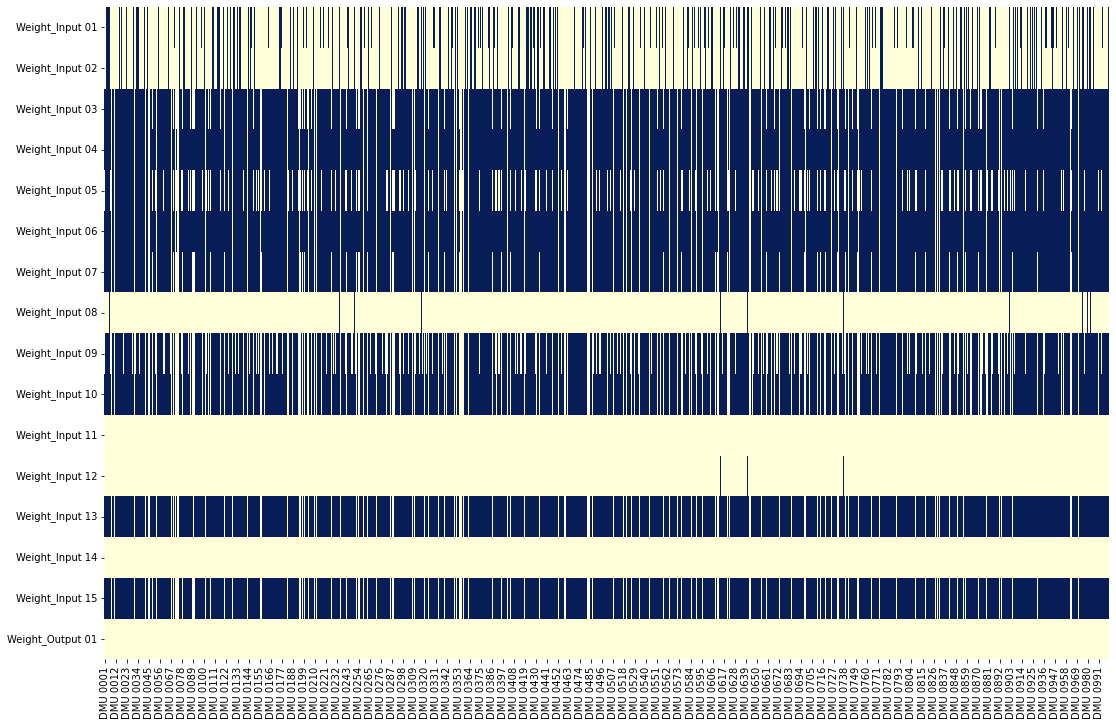

In [8]:
plt.figure(figsize=(18,12))
sns.heatmap(df_sol.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

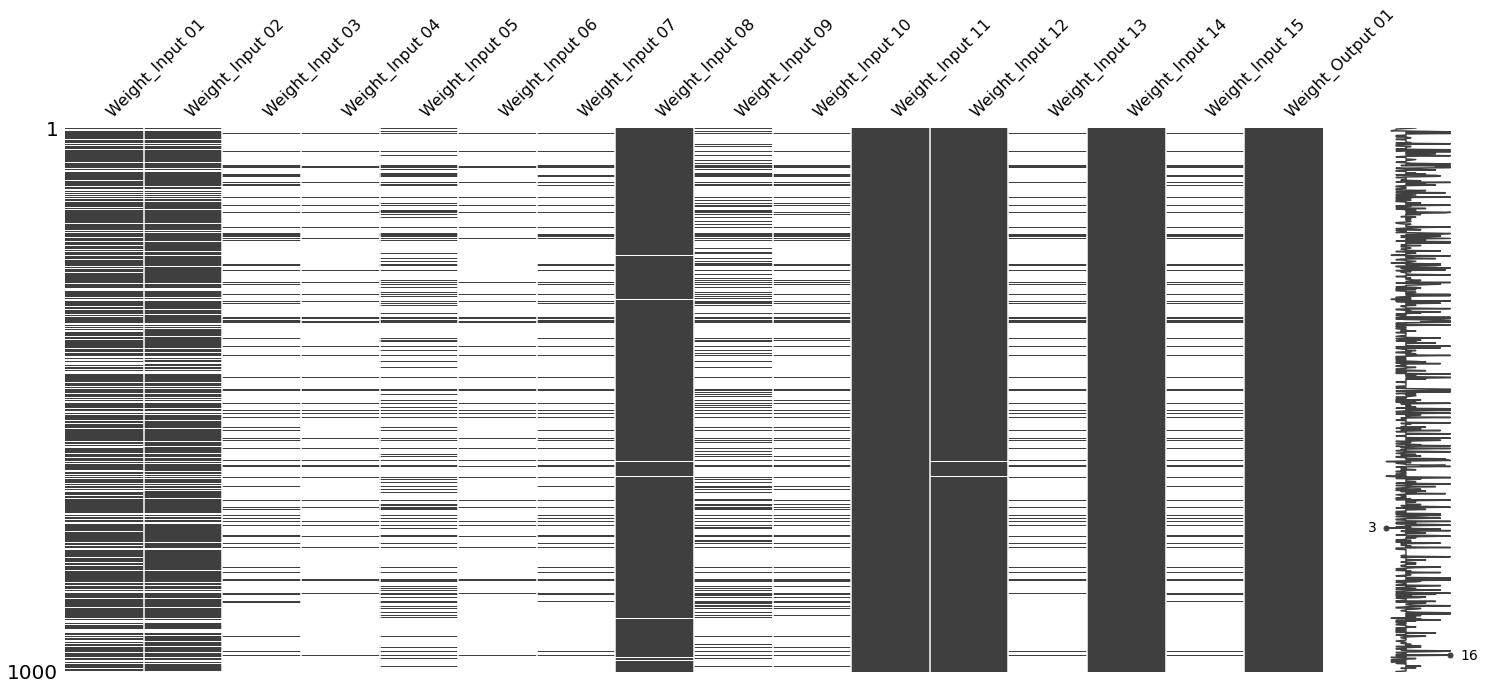

In [9]:
msno.matrix(df_sol.iloc[:,1:].replace(0, np.nan));

In [10]:
df_sol.iloc[:,1:].replace(0, np.nan).isna().sum(axis=1).describe()

count    1000.000000
mean        8.087000
std         3.109196
min         0.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        13.000000
dtype: float64

### DecisionTreeRegressor

In [11]:
df_dt = pd.read_excel("US15I1O_decisiontreeregressor_Solution_4.xlsx", index_col=0)
df_dt

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.834124,0.000067,0.000547,0.000067,0.000067,0.000067,0.000067,0.000067,0.000547,0.000067,0.0,0.000547,0.000547,0.0,0.000547,0.000067,0.001380
DMU 0002,0.720755,0.000291,0.000291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000291,0.000000,0.0,0.000647,0.000647,0.0,0.000647,0.000000,0.001311
DMU 0003,0.711432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000686,0.000000,0.0,0.000974,0.000974,0.0,0.000974,0.000000,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.0,0.000859,0.000859,0.0,0.000859,0.000000,0.001794
DMU 0005,0.720618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000721,0.000000,0.0,0.000721,0.000721,0.0,0.000721,0.000000,0.001505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.682288,0.000227,0.000227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000598,0.000000,0.0,0.000717,0.000717,0.0,0.000717,0.000000,0.001570
DMU 0997,0.803977,0.000246,0.000246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000662,0.000000,0.0,0.000662,0.000662,0.0,0.000662,0.000000,0.001521
DMU 0998,0.719427,0.000208,0.000571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000571,0.000000,0.0,0.000732,0.000732,0.0,0.000732,0.000000,0.001604
DMU 0999,0.721136,0.000215,0.000215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000568,0.000000,0.0,0.000681,0.000681,0.0,0.000681,0.000000,0.001491


In [12]:
print((df_dt==0).sum())
print("Total : ", (df_dt==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      257
Weight_Input 02      201
Weight_Input 03      765
Weight_Input 04      744
Weight_Input 05      812
Weight_Input 06      750
Weight_Input 07      869
Weight_Input 08        8
Weight_Input 09      926
Weight_Input 10      971
Weight_Input 11        0
Weight_Input 12        3
Weight_Input 13      984
Weight_Input 14        0
Weight_Input 15      765
Weight_Output 01       0
dtype: int64
Total :  8055


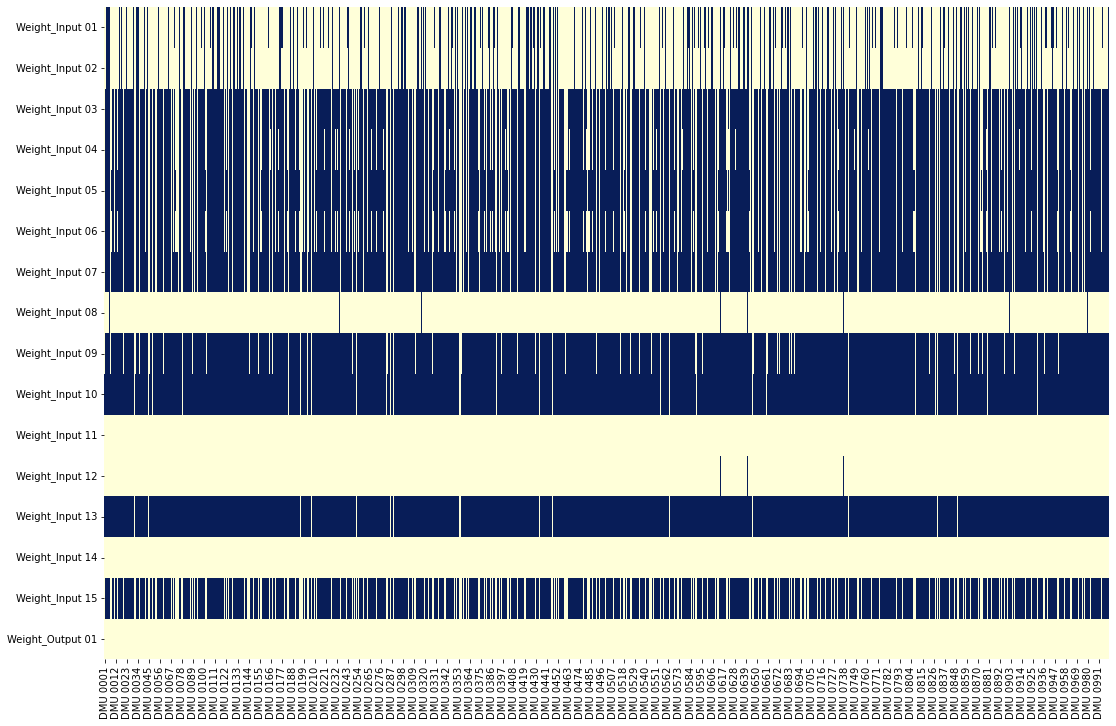

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dt.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [14]:
res_dt = pd.DataFrame()
res_dt["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_dt["Efficiency_Scores_DT"] = df_dt["Efficiency_Scores"]
res_dt["Diff"] = res_dt["Efficiency_Scores_Basic"]  - res_dt["Efficiency_Scores_DT"]
res_dt["Diff_Perc"] = (res_dt["Diff"] / res_dt["Efficiency_Scores_Basic"]) * 100 
res_dt["Diff_Perc < 10"] = np.abs(res_dt["Diff_Perc"]) < 10  
res_dt = res_dt.round(4)
res_dt


,Efficiency_Scores_Basic,Efficiency_Scores_DT,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.8330,0.8341,-0.0011,-0.1371,True
DMU 0002,0.7208,0.7208,0.0000,0.0000,True
DMU 0003,0.7114,0.7114,0.0000,0.0000,True
DMU 0004,0.5540,0.5540,0.0000,0.0000,True
DMU 0005,0.7206,0.7206,-0.0000,-0.0000,True
...,...,...,...,...,...
DMU 0996,0.6823,0.6823,-0.0000,-0.0000,True
DMU 0997,0.8040,0.8040,0.0000,0.0000,True
DMU 0998,0.7194,0.7194,0.0000,0.0000,True
DMU 0999,0.7211,0.7211,0.0000,0.0000,True


In [15]:
mitosheet.sheet(res_dt, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-0fbd5b05-26f5-4fc2-bf9f-66067cc19e53", "code": {"imports…

In [16]:
blue = res_dt["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_dt["Diff_Perc < 10"]) - (res_dt["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  1000
red :  0


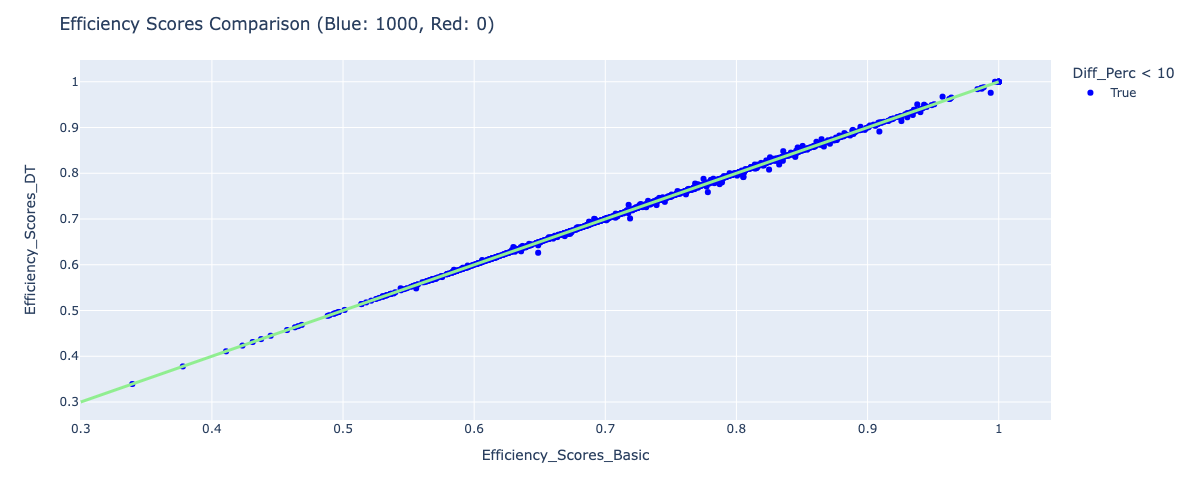

In [17]:
fig = px.scatter(res_dt, x="Efficiency_Scores_Basic", y="Efficiency_Scores_DT", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_DT", "Diff_Perc"] + [res_dt.index])

fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### RandomForestRegressor

In [18]:
df_rf = pd.read_excel("US15I1O_randomforestregressor_Solution_4.xlsx", index_col=0)
df_rf

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.835984,0.000000,0.000540,0.000000,0.0,0.000485,0.0,0.0,0.000540,0.0,0.000000,0.000540,0.000540,0.0,0.000540,0.0,0.001383
DMU 0002,0.725468,0.000122,0.000122,0.000122,0.0,0.000122,0.0,0.0,0.000122,0.0,0.000122,0.000662,0.000662,0.0,0.000662,0.0,0.001319
DMU 0003,0.711432,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000686,0.0,0.000000,0.000974,0.000974,0.0,0.000974,0.0,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000859,0.0,0.000000,0.000859,0.000859,0.0,0.000859,0.0,0.001794
DMU 0005,0.720618,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000721,0.0,0.000000,0.000721,0.000721,0.0,0.000721,0.0,0.001505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.684089,0.000126,0.000135,0.000000,0.0,0.000135,0.0,0.0,0.000453,0.0,0.000000,0.000762,0.000762,0.0,0.000762,0.0,0.001574
DMU 0997,0.800324,0.000130,0.000130,0.000130,0.0,0.000130,0.0,0.0,0.000631,0.0,0.000000,0.000631,0.000631,0.0,0.000631,0.0,0.001514
DMU 0998,0.717665,0.000121,0.000443,0.000000,0.0,0.000121,0.0,0.0,0.000443,0.0,0.000000,0.000769,0.000769,0.0,0.000769,0.0,0.001600
DMU 0999,0.719398,0.000123,0.000123,0.000000,0.0,0.000123,0.0,0.0,0.000433,0.0,0.000000,0.000719,0.000719,0.0,0.000719,0.0,0.001487


In [19]:
print((df_rf==0).sum())
print("Total : ", (df_rf==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      384
Weight_Input 02      221
Weight_Input 03      644
Weight_Input 04      897
Weight_Input 05      305
Weight_Input 06      902
Weight_Input 07      967
Weight_Input 08        8
Weight_Input 09      955
Weight_Input 10      764
Weight_Input 11        0
Weight_Input 12        3
Weight_Input 13      991
Weight_Input 14        0
Weight_Input 15      913
Weight_Output 01       0
dtype: int64
Total :  7954


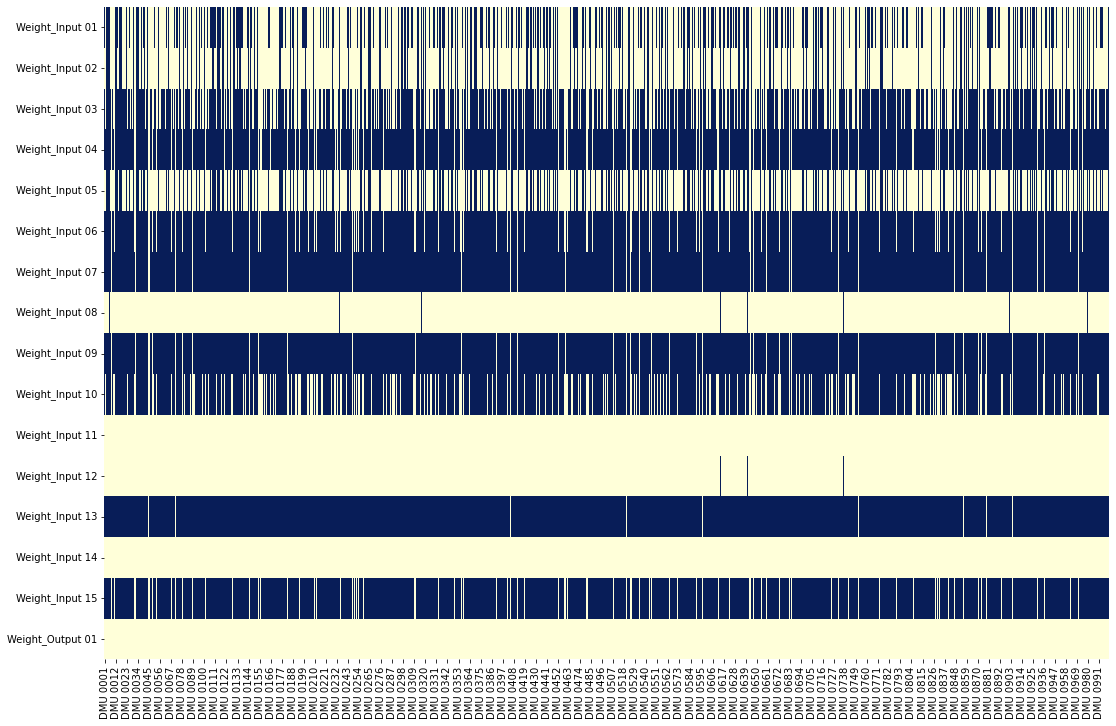

In [20]:
plt.figure(figsize=(18,12))
sns.heatmap(df_rf.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [21]:
res_rf = pd.DataFrame()
res_rf["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_rf["Efficiency_Scores_RF"] = df_rf["Efficiency_Scores"]
res_rf["Diff"] = res_rf["Efficiency_Scores_Basic"]  - res_rf["Efficiency_Scores_RF"]
res_rf["Diff_Perc"] = (res_rf["Diff"] / res_rf["Efficiency_Scores_Basic"]) * 100 
res_rf["Diff_Perc < 10"] = np.abs(res_rf["Diff_Perc"]) < 10  
res_rf = res_rf.round(4)
res_rf


,Efficiency_Scores_Basic,Efficiency_Scores_RF,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.8330,0.8360,-0.0030,-0.3604,True
DMU 0002,0.7208,0.7255,-0.0047,-0.6539,True
DMU 0003,0.7114,0.7114,0.0000,0.0000,True
DMU 0004,0.5540,0.5540,0.0000,0.0000,True
DMU 0005,0.7206,0.7206,-0.0000,-0.0000,True
...,...,...,...,...,...
DMU 0996,0.6823,0.6841,-0.0018,-0.2639,True
DMU 0997,0.8040,0.8003,0.0037,0.4545,True
DMU 0998,0.7194,0.7177,0.0018,0.2448,True
DMU 0999,0.7211,0.7194,0.0017,0.2410,True


In [22]:
mitosheet.sheet(res_rf, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-f1cd856c-31b0-41f7-a187-d9e0579e4ffa", "code": {"imports…

In [23]:
blue = res_rf["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_rf["Diff_Perc < 10"]) - (res_rf["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  1000
red :  0


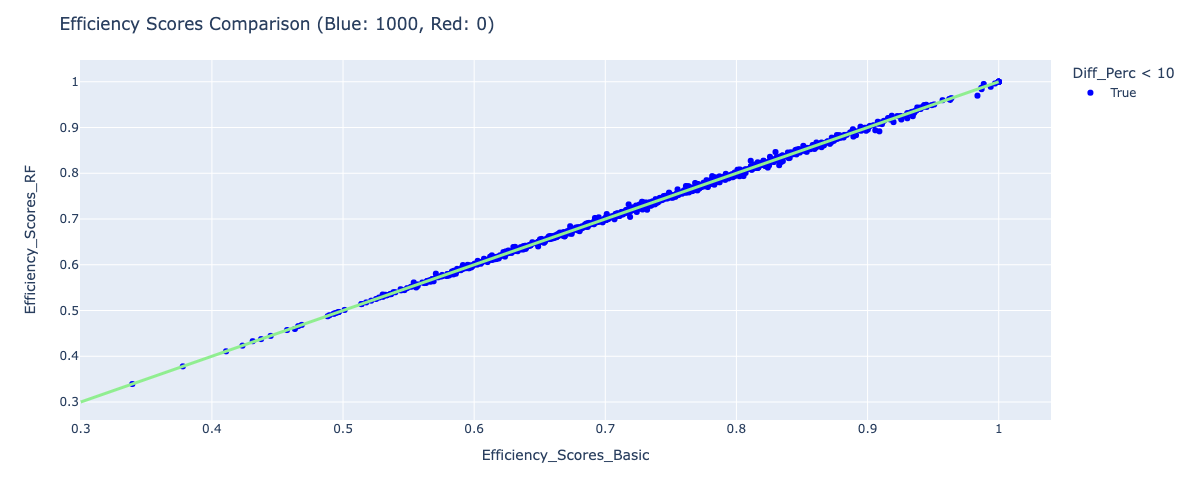

In [24]:
fig = px.scatter(res_rf, x="Efficiency_Scores_Basic", y="Efficiency_Scores_RF", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_RF", "Diff_Perc"] + [res_rf.index])

fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### GradientBoostingRegressor

In [25]:
df_gb = pd.read_excel("US15I1O_gradientboostingregressor_Solution_4.xlsx", index_col=0)
df_gb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.852948,0.000012,0.000565,0.000012,0.000012,0.000012,0.000012,0.000012,0.000565,0.000565,0.000012,0.000565,0.000565,0.000012,0.000565,0.000012,0.001411
DMU 0002,0.719351,0.000122,0.000122,0.000122,0.000000,0.000000,0.000000,0.000000,0.000122,0.000122,0.000122,0.000653,0.000653,0.000000,0.000653,0.000122,0.001308
DMU 0003,0.711432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000686,0.000000,0.000000,0.000974,0.000974,0.000000,0.000974,0.000000,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000859,0.000859,0.000000,0.000859,0.000000,0.001794
DMU 0005,0.720618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000721,0.000000,0.000000,0.000721,0.000721,0.000000,0.000721,0.000000,0.001505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.679138,0.000055,0.000351,0.000055,0.000000,0.000055,0.000000,0.000055,0.000351,0.000055,0.000055,0.000753,0.000753,0.000055,0.000753,0.000055,0.001562
DMU 0997,0.797473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000722,0.000000,0.000000,0.000722,0.000722,0.000000,0.000722,0.000000,0.001508
DMU 0998,0.718003,0.000137,0.000473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000473,0.000137,0.000000,0.000765,0.000765,0.000000,0.000765,0.000000,0.001601
DMU 0999,0.715059,0.000058,0.000058,0.000058,0.000000,0.000058,0.000000,0.000058,0.000353,0.000058,0.000058,0.000712,0.000712,0.000058,0.000712,0.000058,0.001478


In [26]:
print((df_gb==0).sum())
print("Total : ", (df_gb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      405
Weight_Input 02      271
Weight_Input 03      661
Weight_Input 04      899
Weight_Input 05      710
Weight_Input 06      903
Weight_Input 07      812
Weight_Input 08       11
Weight_Input 09      390
Weight_Input 10      607
Weight_Input 11        0
Weight_Input 12        3
Weight_Input 13      833
Weight_Input 14        0
Weight_Input 15      663
Weight_Output 01       0
dtype: int64
Total :  7168


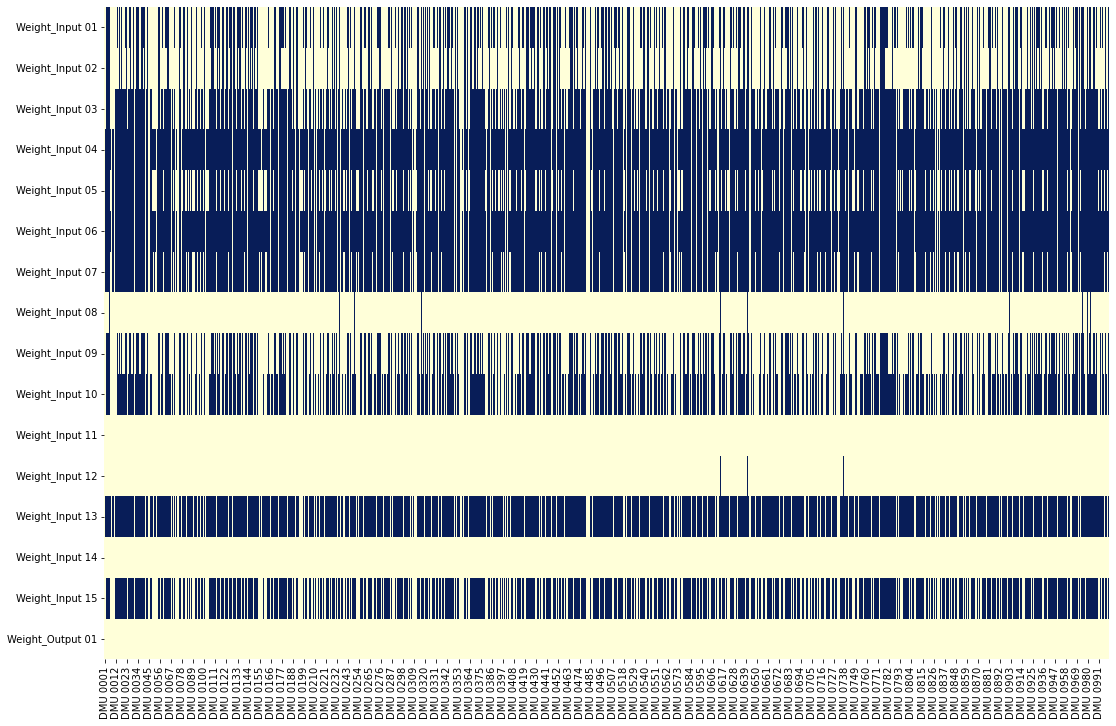

In [27]:
plt.figure(figsize=(18,12))
sns.heatmap(df_gb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [28]:
res_gb = pd.DataFrame()
res_gb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_gb["Efficiency_Scores_GB"] = df_gb["Efficiency_Scores"]
res_gb["Diff"] = res_gb["Efficiency_Scores_Basic"]  - res_gb["Efficiency_Scores_GB"]
res_gb["Diff_Perc"] = (res_gb["Diff"] / res_gb["Efficiency_Scores_Basic"]) * 100 
res_gb["Diff_Perc < 10"] = np.abs(res_gb["Diff_Perc"]) < 10  
res_gb = res_gb.round(4)
res_gb


,Efficiency_Scores_Basic,Efficiency_Scores_GB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.8330,0.8529,-0.0200,-2.3969,True
DMU 0002,0.7208,0.7194,0.0014,0.1949,True
DMU 0003,0.7114,0.7114,0.0000,0.0000,True
DMU 0004,0.5540,0.5540,0.0000,0.0000,True
DMU 0005,0.7206,0.7206,0.0000,0.0000,True
...,...,...,...,...,...
DMU 0996,0.6823,0.6791,0.0032,0.4618,True
DMU 0997,0.8040,0.7975,0.0065,0.8090,True
DMU 0998,0.7194,0.7180,0.0014,0.1979,True
DMU 0999,0.7211,0.7151,0.0061,0.8426,True


In [29]:
mitosheet.sheet(res_gb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-4ecce1b6-16a9-4be1-9d60-312398b5b4ff", "code": {"imports…

In [30]:
blue = res_gb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_gb["Diff_Perc < 10"]) - (res_gb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  1000
red :  0


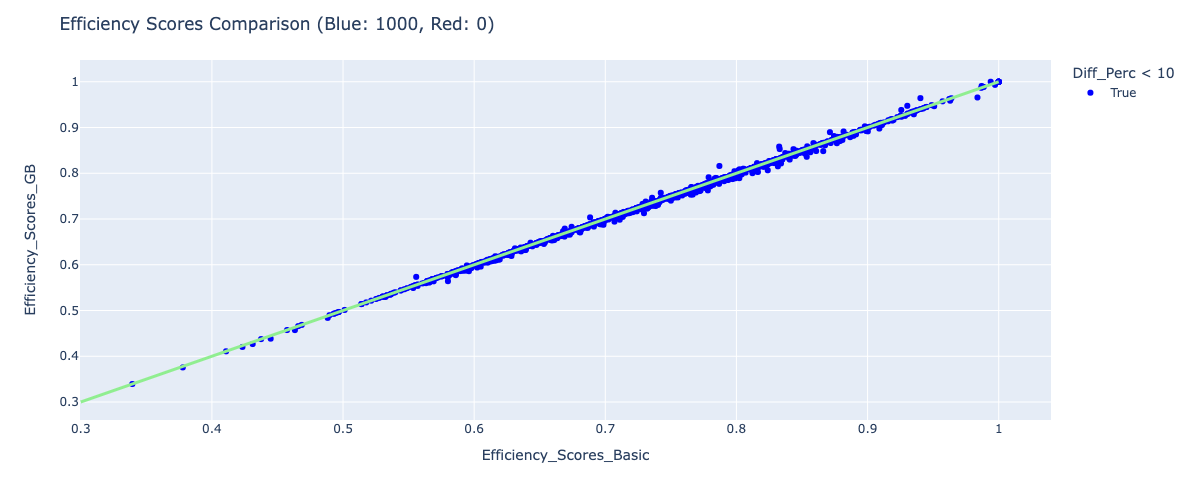

In [31]:
fig = px.scatter(res_gb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_GB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_GB", "Diff_Perc"] + [res_gb.index])

fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### XGBRegressor

In [32]:
df_xgb = pd.read_excel("US15I1O_xgbregressor_Solution_4.xlsx", index_col=0)
df_xgb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.851558,0.000000,0.000192,0.000192,0.000192,0.000192,0.000192,0.000000,0.000192,0.000192,0.000192,0.000192,0.000720,0.000192,0.000720,0.000192,0.001408
DMU 0002,0.734150,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000000,0.000061,0.000061,0.000594,0.000594,0.000594,0.000061,0.000594,0.000061,0.001335
DMU 0003,0.679704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000307,0.000307,0.000307,0.000307,0.001292,0.000307,0.001292,0.000000,0.001813
DMU 0004,0.530710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000452,0.000452,0.000452,0.000777,0.000777,0.000000,0.000777,0.000000,0.001718
DMU 0005,0.707946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000215,0.000215,0.000663,0.000663,0.000663,0.000215,0.000663,0.000000,0.001478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.683673,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.001285,0.000079,0.001285,0.000079,0.001573
DMU 0997,0.784270,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000000,0.000081,0.000081,0.000081,0.000081,0.001204,0.000081,0.001204,0.000081,0.001483
DMU 0998,0.699689,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000473,0.000940,0.000092,0.000940,0.000092,0.001560
DMU 0999,0.707352,0.000038,0.000038,0.000038,0.000038,0.000102,0.000038,0.000038,0.000102,0.000102,0.000625,0.000650,0.000650,0.000102,0.000650,0.000038,0.001462


In [33]:
print((df_xgb==0).sum())
print("Total : ", (df_xgb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      436
Weight_Input 02      327
Weight_Input 03      330
Weight_Input 04      324
Weight_Input 05      236
Weight_Input 06      328
Weight_Input 07      704
Weight_Input 08       74
Weight_Input 09       74
Weight_Input 10       60
Weight_Input 11       35
Weight_Input 12        0
Weight_Input 13      193
Weight_Input 14        0
Weight_Input 15      337
Weight_Output 01       0
dtype: int64
Total :  3458


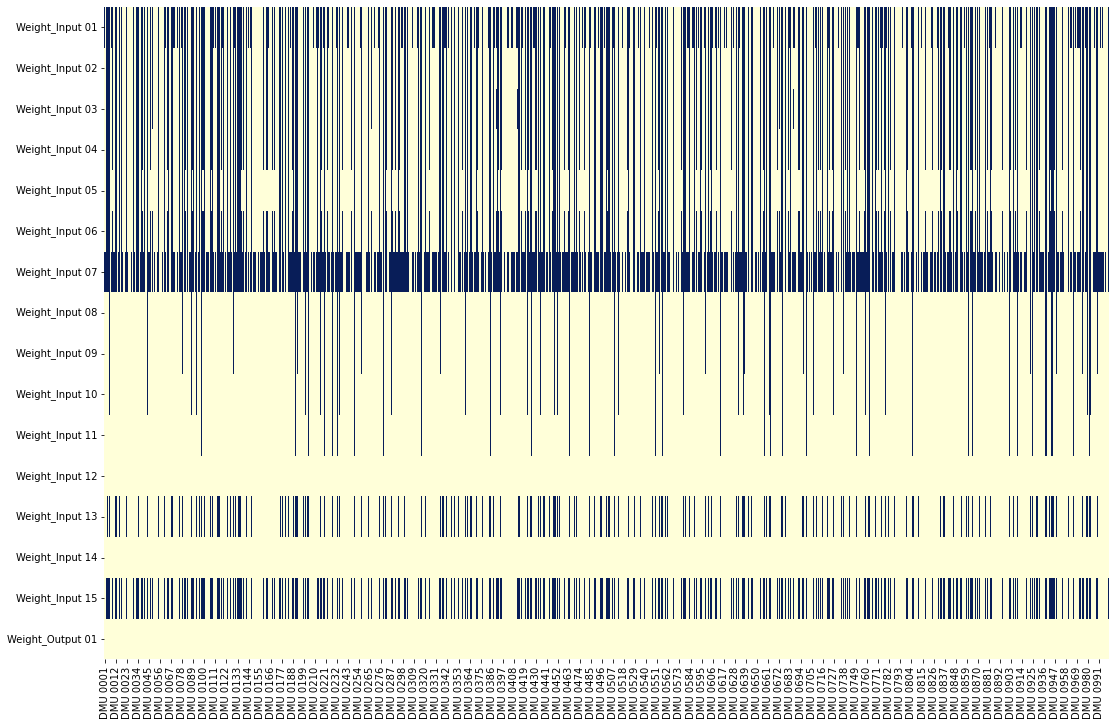

In [34]:
plt.figure(figsize=(18,12))
sns.heatmap(df_xgb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [35]:
res_xgb = pd.DataFrame()
res_xgb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_xgb["Efficiency_Scores_XGB"] = df_xgb["Efficiency_Scores"]
res_xgb["Diff"] = res_xgb["Efficiency_Scores_Basic"]  - res_xgb["Efficiency_Scores_XGB"]
res_xgb["Diff_Perc"] = (res_xgb["Diff"] / res_xgb["Efficiency_Scores_Basic"]) * 100 
res_xgb["Diff_Perc < 10"] = np.abs(res_xgb["Diff_Perc"]) < 10  
res_xgb = res_xgb.round(4)
res_xgb


,Efficiency_Scores_Basic,Efficiency_Scores_XGB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.8330,0.8516,-0.0186,-2.2300,True
DMU 0002,0.7208,0.7342,-0.0134,-1.8585,True
DMU 0003,0.7114,0.6797,0.0317,4.4597,True
DMU 0004,0.5540,0.5307,0.0232,4.1964,True
DMU 0005,0.7206,0.7079,0.0127,1.7585,True
...,...,...,...,...,...
DMU 0996,0.6823,0.6837,-0.0014,-0.2030,True
DMU 0997,0.8040,0.7843,0.0197,2.4513,True
DMU 0998,0.7194,0.6997,0.0197,2.7436,True
DMU 0999,0.7211,0.7074,0.0138,1.9114,True


In [36]:
mitosheet.sheet(res_xgb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-af03fbb4-78dd-4b4d-ad07-165d4ce75c3d", "code": {"imports…

In [37]:
blue = res_xgb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_xgb["Diff_Perc < 10"]) - (res_xgb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  993
red :  7


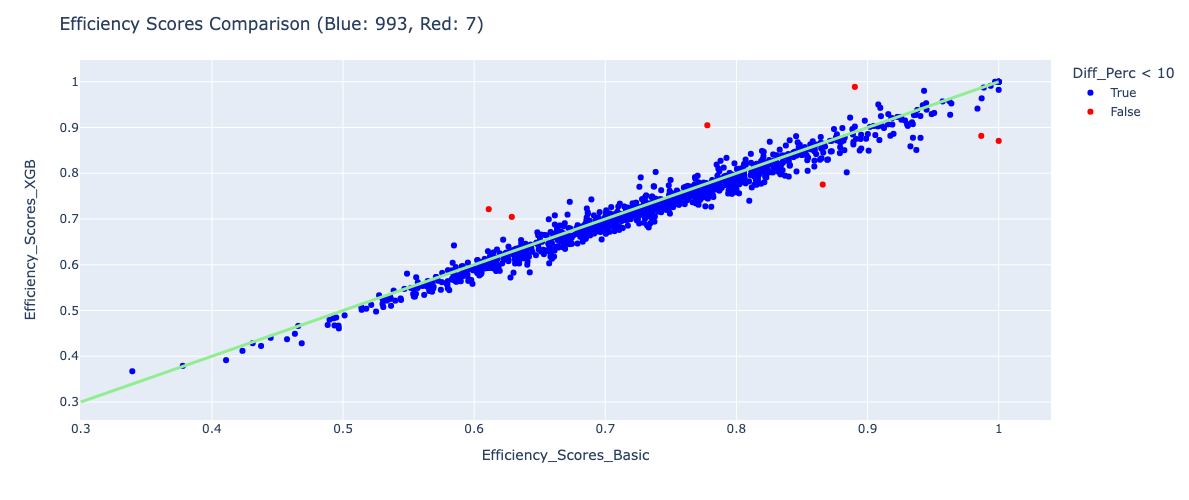

In [38]:
fig = px.scatter(res_xgb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_XGB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_XGB", "Diff_Perc"] + [res_xgb.index])

fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()